# Interpolation and Curve Fitting
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), November 2024
The code in this Jupyter notebook runs in a conda environment `interp-2024` specified in the `environment.yml` file in this same folder. The version of Python and other key packages in that environment are the following:

| Package | Version |
| :---    | :---:   |
| python  |  3.13.0 |
| numpy   |   2.1.3 |
| scipy   |  1.14.1 |

## 1. Introduction
The general broad definition of interpolation "a method of constructing new data points within the range of a discrete set of known data points" (*Wikipedia*, "[Interpolation](https://en.wikipedia.org/wiki/Interpolation)"). Interpolation is a nonparametric method of inferring unknown data from known data. Examples include estimating a linear regression and using that regression to predict $\hat{y}_i$ values from $X_i$ values that were not in the data. It also includes curve-fitting in which the curve is required to pass through all the data points.

1. We will define as **regression interpolation** the type of interpolation in which the estimated function need not or cannot pass through all the data points.
2. We will define as **spline interpolation** the type of interpolation in which the estimated function necessarily passes through all the data points.

You should look at the documentation for [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html).

## 2. Types of interpolants

### 2.1. Curve fitting or regression interpolation

#### 2.1.1. Piecewise constant curve fit

#### 2.1.2. Polynomial curve fit
High order polynomials, orthogonal polynomials (Chebyshev polynomials), pitfalls of high order polynomials.

#### 2.1.3. Kernel density estimator curve fit
Non-parametric density estimator.

### 2.2. Splines

#### 2.2.1. Piecewise constant interpolation
Divide the range of the data into bins, one bin per data point. You can choose the bin edges to be anywhere between data points. The interpolated value of the function is the data point value of that bin. This can be called nearest neighbor interpolation. You can see how this is related to a $K$ nearest neighbor (KNN) classifier. A $K=1$ KNN classifier would choose the bin edges as the midpoints between the data points.
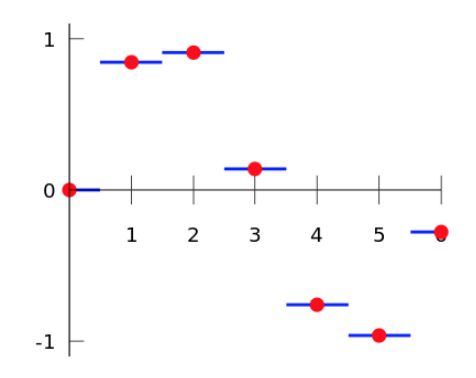

#### 2.2.2. Linear spline
A practical definition of a linear spline is to connect each of the data points with a line. Let each data point be labeled $x_i\in\{x_1,x_2,...x_N\}$. Let the linear function between points $x_i$ and $x_{i+1}$ be defined as the following line,
\begin{equation*}
  f_{i}(x) = a_i x + b_i
\end{equation*}
The solution for $a_i$ and $b_i$ is just the two-point equation for a line.
\begin{equation*}
  a_i = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} \quad b_i = f(x_i) - a_i x_i
\end{equation*}
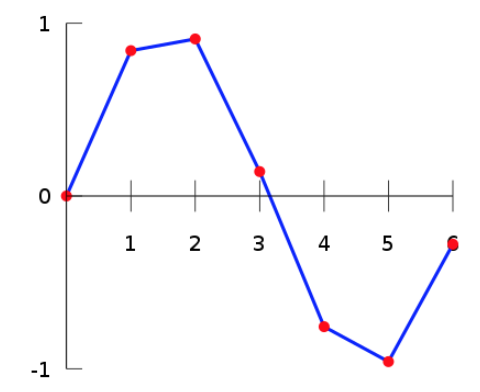

#### 2.2.3. Cubic spline
A cubic spline fits a cubic polynomial between points $x_i$ and $x_{i+1}$. Let the cubic polynomial between $x_i$ and $x_{i+1}$ defined as the following,
\begin{equation*}
  f_{i}(x) = a_i x^3 + b_i x^2 + c_i x + d_i
\end{equation*}
The cubic polynomial must satisfy four conditions to pin down the four parameters $a_i$, $b_i$, $c_i$, and $d_i$. The polynomial must pass through both end points (two conditions) and the second derivatives must be zero at the end points (two conditions).
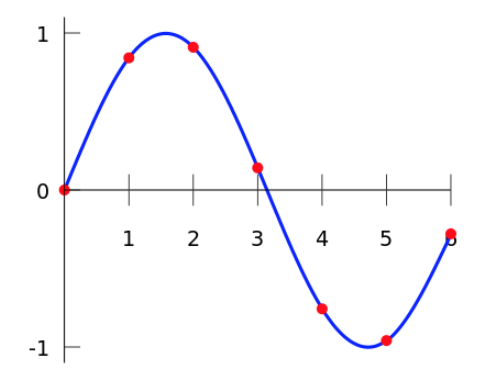

## 3. Examples

### 3.1. Fertility rates
The U.S. National Vital Statistics Reports, Volume 64, Number 1,    January 15, 2015, Table 3, final 2013 data [http://www.cdc.gov/nchs/data/nvsr/nvsr64/nvsr64_01.pdf](http://www.cdc.gov/nchs/data/nvsr/nvsr64/nvsr64_01.pdf) shows number of births per 1,000 females by age group

In [37]:
# Set matplotlib magic command for Jupyter notebook to allow manipulation of
# plots in the notebook after they are rendered
# %matplotlib inline
# %matplotlib notebook
%matplotlib widget

# Import packages
import numpy as np
import pandas as pd
import scipy.interpolate as si
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


Plot a scatterplot of the data.

Text(0, 0.5, 'Fertility rate $f_{s}$')

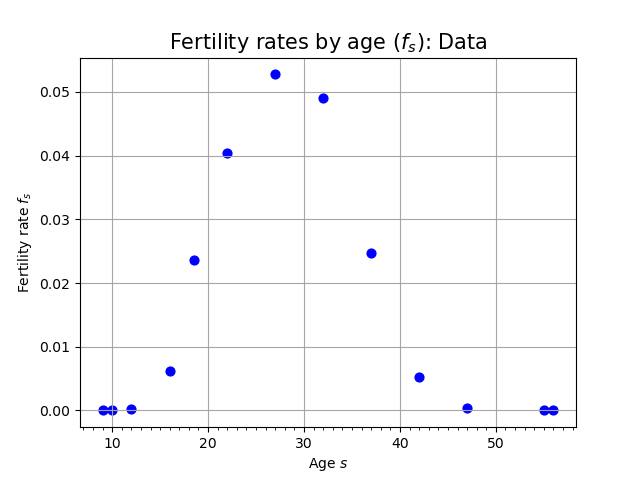

In [38]:
# Hard code input births data by age group
# Add two zeros on the end of each vector
# Age bins are 9, 10, 10-14, 15-17, 18-19, 20-24, 25-29, 30-34, 35-39,
# 40-44, 45-49, 55, 56. First two and last two are not data

fert_data = (np.array([0.0, 0.0, 0.3, 12.3, 47.1, 80.7, 105.5, 98.0,
                       49.3, 10.4, 0.8, 0.0, 0.0]) / 2000)
age_midp = np.array([9, 10, 12, 16, 18.5, 22, 27, 32, 37, 42, 47,
                     55, 56])

fig, ax = plt.subplots()
plt.scatter(age_midp, fert_data, s=40, c='blue', marker='o',
            label='Data')
# for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.title(r'Fertility rates by age ($f_s$): Data', fontsize=15)
plt.xlabel(r'Age $s$')
plt.ylabel(r'Fertility rate $f_{s}$')

Create a cubic spline interpolant of the one-dimensional

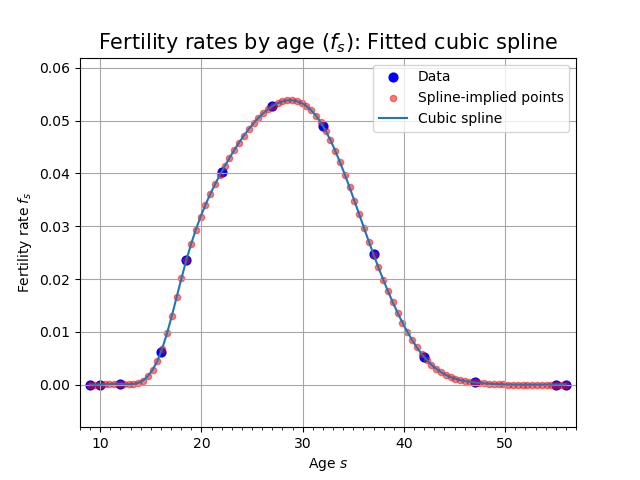

In [39]:
fert_func = si.interp1d(age_midp, fert_data, kind='cubic')

age_fine = np.linspace(age_midp.min(), age_midp.max(), 100)
fert_fine = fert_func(age_fine)

fig, ax = plt.subplots()
plt.scatter(age_midp, fert_data, s=40, c='blue', marker='o',
            label='Data')
plt.scatter(age_fine, fert_fine, s=20, c='red', marker='o',
            alpha=0.5, label='Spline-implied points')
plt.plot(age_fine, fert_fine, label='Cubic spline')
# for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.title(r'Fertility rates by age ($f_s$): Fitted cubic spline',
          fontsize=15)
plt.xlabel(r'Age $s$')
plt.ylabel(r'Fertility rate $f_{s}$')
plt.xlim((age_midp.min() - 1, age_midp.max() + 1))
plt.ylim((-0.15 * (fert_fine.max()),
          1.15 * (fert_fine.max())))
plt.legend(loc='upper right')

Note above that the cubic spline function `fert_func()` will return any vector of values of ages that you give it as an input.

In [40]:
print(r"The interpolated $y$ value at $age=24$ is:", fert_func(24))
print("")
print(r"The interpolated $y$ values at $age=30$ and 44 is:", fert_func([30, 44]))

The interpolated $y$ value at $age=24$ is: 0.046646026371484565

The interpolated $y$ values at $age=30$ and 44 is: [0.05323077 0.00196666]


### 3.2. Two-dimensional linear piecewise interpolant
The functional form that I use for $z=f(x,y)$ is an inverted two-dimensional parabola.

$$
  z = f(x,y) =
  -\Bigl[0.1\left(x-5\right)^2 + 0.2\left(y-5\right)^2\Bigr] - 0.05 xy + 5
$$

Note that as you increase the number of data points on which the piecewise linear function is estimated (`n_data=20` versus `n_data=100`), the quality of the interpolated function is closer to the actual function.

In [54]:
n_data_pwl = 100  # Number of data points
n_grid_pwl = 1000  # Number of grid points for interpolation
np.random.seed(25)
x_pwl = np.random.uniform(low=0.0, high=10.0, size=n_data_pwl)
y_pwl = np.random.uniform(low=0.0, high=10.0, size=n_data_pwl)
z_pwl = (
    -(0.1 * ((x_pwl - 5) ** 2) + 0.2 * ((y_pwl - 5) ** 2))
    - 0.05 * x_pwl * y_pwl + 5
)
interp_pwl = si.LinearNDInterpolator(list(zip(x_pwl, y_pwl)), z_pwl)

X_pwl = np.linspace(min(x_pwl), max(x_pwl), n_grid_pwl)
Y_pwl = np.linspace(min(y_pwl), max(y_pwl), n_grid_pwl)
X_grid_pwl, Y_grid_pwl = np.meshgrid(X_pwl, Y_pwl)  # 2D matrix grid X and Y for interpolation
Z_grid_pwl = interp_pwl(X_grid_pwl, Y_grid_pwl)
print("Interpolated Z value at (5, 5) =", interp_pwl(5, 5))

Interpolated Z value at (5, 5) = 3.693464997444357


/var/folders/d4/trj3dssd6s3g8kxvjmczz11w0000gn/T/ipykernel_98747/1982034364.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Text(0.5, 0, '$z$')

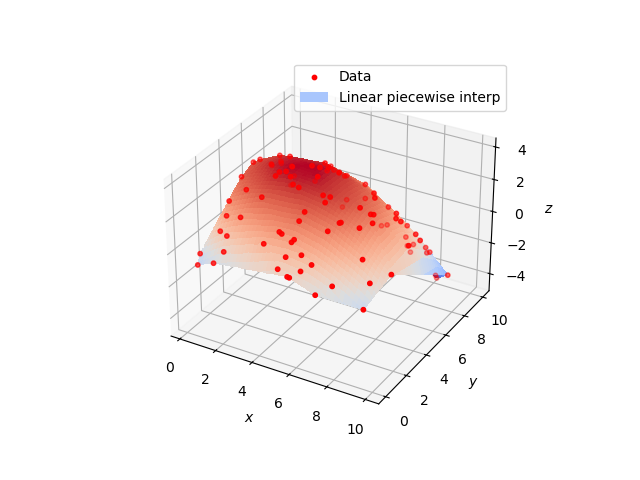

In [55]:
# Make 3D scatter plot of the data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pwl, y_pwl, z_pwl, c='r', marker='o', s=10, label='Data')
surf = ax.plot_surface(
    X_grid_pwl, Y_grid_pwl, Z_grid_pwl, cmap=cm.coolwarm, linewidth=1,
    antialiased=False, label='Linear piecewise interp')
ax.legend(loc='upper right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

### 3.3. Two-dimensional nonlinear interpolant (radial basic function interpolant)
Because the shape of this function between data points is simple, a basic nonlinear multidimentional interpolant will allow us to accurately interpolate the true function with fewer data points. For example, test how much better the interpolation below is with `n_data=20` than is the above piecewise linear interpolation with `n_data=20`.

In [58]:
n_data_rbf = 100  # Number of data points
n_grid_rbf = 1000  # Number of grid points for interpolation
np.random.seed(25)
x_rbf = np.random.uniform(low=0.0, high=10.0, size=n_data_rbf)
y_rbf = np.random.uniform(low=0.0, high=10.0, size=n_data_rbf)
z_rbf = (
    -(0.1 * ((x_rbf - 5) ** 2) + 0.2 * ((y_rbf - 5) ** 2))
    - 0.05 * x_rbf * y_rbf + 5
)
interp_rbf = si.RBFInterpolator(list(zip(x_rbf, y_rbf)), z_rbf)
# print("interpolated Z at (5,5) =", interp_rbf(np.array([[5, 5]])))
X_rbf = np.linspace(min(x_rbf), max(x_rbf), n_grid_rbf)
Y_rbf = np.linspace(min(y_rbf), max(y_rbf), n_grid_rbf)
X_grid_rbf, Y_grid_rbf = np.meshgrid(X_rbf, Y_rbf)
XY_data_vec_rbf = np.hstack(
    (
        X_grid_rbf.flatten().reshape((n_grid_rbf ** 2, 1)),
        Y_grid_rbf.flatten().reshape((n_grid_rbf ** 2, 1))
    )
)
# Input to interp_rbf function must by 2D array with shape (N, expl_vars)
Z_grid_rbf = interp_rbf(XY_data_vec_rbf).reshape((n_grid_rbf, n_grid_rbf))

Text(0.5, 0, '$z$')

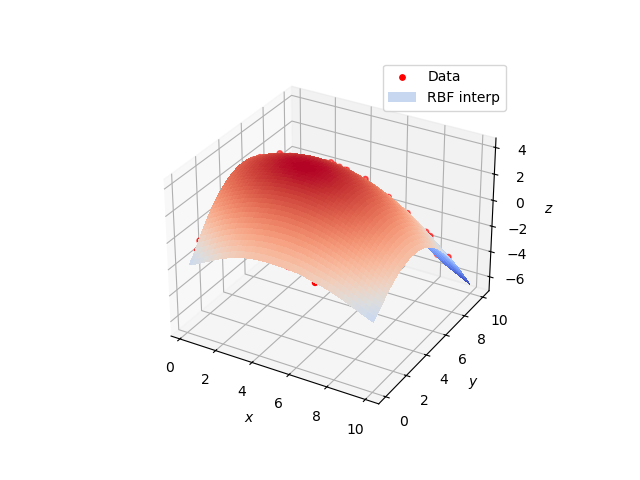

In [59]:
# Make 3D scatter plot of the data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_rbf, y_rbf, z_rbf, c='r', marker='o', s=15, label='Data')
surf = ax.plot_surface(
    X_grid_rbf, Y_grid_rbf, Z_grid_rbf, cmap=cm.coolwarm, linewidth=0,
    antialiased=False, label='RBF interp')
ax.legend(loc='upper right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

### 3.4. RBF interpolation of 7-dimensional input 4-dimensional output OG Lifespan

In [61]:
# Import the data as an inputs matrix NumPy array (N, K) and an outputs matrix
# Numpy array (N, J)
sensitivity_data_df = pd.read_csv('all_sources_together.csv', delimiter=',')
print(sensitivity_data_df.describe())
# Create numpy array with age_effect, initial_effect, final_effect, mort_effect, prod_effect, fert_effect
input_data_array = sensitivity_data_df[
    [
        "age_effect", "initial_effect", "final_effect", "mort_effect",
        "prod_effect", "fert_effect", "discount_rate"
    ]
].to_numpy()
print("input_data_array.shape =", input_data_array.shape)
output_data_array = sensitivity_data_df[
    [
        "pop_diffs_2045_2065", "pop_diffs_2025_2100", "pop_diffs_2050",
        "avg_diff", "avg_gdp_pc_diff", "NPV"
    ]
].to_numpy()
print("output_data_array.shape =", output_data_array.shape)


        Unnamed: 0   age_effect  initial_effect  final_effect  mort_effect  \
count  2832.000000  2832.000000     2832.000000   2832.000000  2832.000000   
mean   1016.118644    51.302966        8.427966     10.377119     1.950403   
std     784.154763    10.565803        8.103998      8.246495     2.177876   
min       0.000000    40.000000        0.000000      0.000000     0.000000   
25%     353.750000    40.000000        0.000000      0.000000     0.000000   
50%     773.500000    50.000000       10.000000     10.000000     1.000000   
75%    1643.250000    65.000000       20.000000     20.000000     5.000000   
max    2639.000000    65.000000       20.000000     20.000000     5.000000   

       prod_effect  fert_effect  pop_diffs_2045_2065  pop_diffs_2025_2100  \
count  2832.000000  2832.000000          2832.000000         2.832000e+03   
mean      1.845148     0.674746           111.923502         4.575035e+02   
std       2.116141     0.633120           138.362488         5.087

In [60]:
interp_rbf_OGlifesense = si.RBFInterpolator(
    input_data_array, output_data_array
)

In [69]:
# Print the NPV of a particular set of inputs
interp_rbf_OGlifesense(np.array([[42, 7, 9, 0.111, 0.222, 0.009, 0.0177]]))[0]

array([ 6.35784328e+00,  1.71333092e+01,  3.02061410e-01,  2.12868926e+02,
        5.44670255e+02, -2.97500706e+01])